# NHL Pucknight Live - Feb 26, 2021

In [3]:
from pucknight import nhl_api, pn_queries
from hockey_rink import NHLRink
import matplotlib.pyplot as plt
import pandas as pd
import datetime
league = 'NHL'
season = '2021-22'
stats_date = '2021-10-01'
gd1 = datetime.date(2022, 2, 28)
gd2 = datetime.date(2022, 3, 1)

In [4]:
stand = pn_queries.league_standings(league,season)
stats = pn_queries.league_scoring(league, season)
goalies = pn_queries.league_goalies(league, season)
fantasy_s = pn_queries.skater_score_by_date(stats_date)
fantasy_g = pn_queries.goalie_score_by_date(stats_date)
fs_totals = fantasy_s.groupby(['ep_playerid','playername'])\
    .agg({'nhl_playerid':'max','position':'max','team':'max'
          ,'skater_score':['mean','sum'],'game_date':'count'}).reset_index()         
fs_totals.columns = ['ep_playerid','playername','nhl_playerid'
                     ,'position','team','ss_mean','ss_tot','gp']
fg_totals = fantasy_g.groupby(['ep_playerid','playername'])\
    .agg({'nhl_playerid':'max', 'position':'max','team':'max'
          ,'goalie_score':['mean','sum'],'game_date':'count'}).reset_index()
fg_totals.columns = ['ep_playerid','playername','nhl_playerid'
                     ,'position','team','gs_mean','gs_tot','gp'] 

## API REFRESH

In [10]:
games_df = pn_queries.api_games(season=season, game_type='Regular Season')

In [11]:
gms_day = games_df[(games_df.game_date >= gd1) & (games_df.game_date <= gd2) & (games_df.game_status != 'Final')]
nhl_api.games_refresh(list(gms_day.game_id))

Game Info loaded successfully in PostgreSQL 
PostgreSQL connection is closed
Game Officials loaded successfully in PostgreSQL 
PostgreSQL connection is closed
Game Events loaded successfully in PostgreSQL 
PostgreSQL connection is closed
Player Events loaded successfully in PostgreSQL 
PostgreSQL connection is closed
Game Lineups loaded successfully in PostgreSQL 
PostgreSQL connection is closed
Skater Lines loaded successfully in PostgreSQL 
PostgreSQL connection is closed
Goalie Lines loaded successfully in PostgreSQL 
PostgreSQL connection is closed
Coach Info loaded successfully in PostgreSQL 
PostgreSQL connection is closed
Game in Progress: 2021020847
Game Shifts loaded successfully in PostgreSQL 
PostgreSQL connection is closed
all stats run for: 2021020847
Game Info loaded successfully in PostgreSQL 
PostgreSQL connection is closed
Game Officials loaded successfully in PostgreSQL 
PostgreSQL connection is closed
Game Events loaded successfully in PostgreSQL 
PostgreSQL connecti

In [12]:
games_df = pn_queries.api_games(season=season, game_type='Regular Season')

In [13]:
print("Last Refreshed: " + str(datetime.datetime.now().strftime('%H:%M:%S')))

Last Refreshed: 21:15:05


## Tonight's Game Schedule

In [14]:
games_df[(games_df.game_date >= gd1) & (games_df.game_date <= gd2)]\
.fillna('-').sort_values(['game_status','game_date','datetime_start','game_id'])

,game_id,season,game_type,game_date,datetime_start,game_status,home_team,home_score,away_team,away_score,venue,venue_city,a_div,h_div,period,time_remaining
842,2021020839,2021-22,Regular Season,2022-02-28,00:30:00-05:00,Final,Rangers,2.0,Canucks,5.0,Madison Square Garden,New York,Pacific,Metropolitan,3,0 days 00:00:00
841,2021020845,2021-22,Regular Season,2022-02-28,01:30:00-05:00,Final,Ducks,0.0,Islanders,4.0,Honda Center,Anaheim,Metropolitan,Pacific,3,0 days 00:00:00
840,2021020846,2021-22,Regular Season,2022-02-28,03:00:00-05:00,Final,Sharks,3.0,Kraken,1.0,SAP Center at San Jose,San Jose,Pacific,Pacific,3,0 days 00:00:00
843,2021020847,2021-22,Regular Season,2022-03-01,00:30:00-05:00,In Progress,Devils,6.0,Canucks,2.0,Prudential Center,Newark,Pacific,Metropolitan,2,0 days 01:34:00
845,2021020849,2021-22,Regular Season,2022-03-01,00:30:00-05:00,In Progress,Capitals,2.0,Maple Leafs,3.0,Capital One Arena,Washington,Atlantic,Metropolitan,2,0 days 00:10:00
844,2021020850,2021-22,Regular Season,2022-03-01,03:30:00-05:00,Scheduled,Kings,0.0,Bruins,0.0,Crypto.com Arena,Los Angeles,Atlantic,Pacific,1,0 days 20:00:00


In [15]:
gms_day = games_df[(games_df.game_date >= gd1) & (games_df.game_date <= gd2)]\
.fillna('-').sort_values(['game_status','datetime_start','game_id']).reset_index().iloc[:]
gms_day[['game_id','game_date','datetime_start','game_status','period','time_remaining'
         ,'home_team','home_score','away_team','away_score','venue']]

,game_id,game_date,datetime_start,game_status,period,time_remaining,home_team,home_score,away_team,away_score,venue
0,2021020839,2022-02-28,00:30:00-05:00,Final,3,0 days 00:00:00,Rangers,2.0,Canucks,5.0,Madison Square Garden
1,2021020845,2022-02-28,01:30:00-05:00,Final,3,0 days 00:00:00,Ducks,0.0,Islanders,4.0,Honda Center
2,2021020846,2022-02-28,03:00:00-05:00,Final,3,0 days 00:00:00,Sharks,3.0,Kraken,1.0,SAP Center at San Jose
3,2021020847,2022-03-01,00:30:00-05:00,In Progress,2,0 days 01:34:00,Devils,6.0,Canucks,2.0,Prudential Center
4,2021020849,2022-03-01,00:30:00-05:00,In Progress,2,0 days 00:10:00,Capitals,2.0,Maple Leafs,3.0,Capital One Arena
5,2021020850,2022-03-01,03:30:00-05:00,Scheduled,1,0 days 20:00:00,Kings,0.0,Bruins,0.0,Crypto.com Arena


In [138]:
# Need a Team Xwalk from NHL-EP Stand table

## Current Division Standings

In [10]:
stand.pivot(index='div_pos',columns='division',values ='team')\
[['Pacific Division','Central Division','Metropolitan Division','Atlantic Division']]

division,Pacific Division,Central Division,Metropolitan Division,Atlantic Division
div_pos,,,,
1,Calgary Flames,Colorado Avalanche,Carolina Hurricanes,Florida Panthers
2,Los Angeles Kings,St. Louis Blues,Pittsburgh Penguins,Tampa Bay Lightning
3,Vegas Golden Knights,Minnesota Wild,New York Rangers,Toronto Maple Leafs
4,Edmonton Oilers,Nashville Predators,Washington Capitals,Boston Bruins
5,Anaheim Ducks,Dallas Stars,Columbus Blue Jackets,Detroit Red Wings
6,Vancouver Canucks,Winnipeg Jets,New York Islanders,Ottawa Senators
7,San Jose Sharks,Chicago Blackhawks,Philadelphia Flyers,Buffalo Sabres
8,Seattle Kraken,Arizona Coyotes,New Jersey Devils,Montréal Canadiens


In [11]:
lineups = pd.DataFrame()
for gid in gms_day.game_id: 
    gm_lineup = pn_queries.api_lineups(gid)
    lineups = pd.concat([lineups,gm_lineup])

In [12]:
ep_pids=list(lineups[(lineups['status']!='scratch') & \
             (lineups['pos_abbv']!= 'G')].merge(fs_totals[['nhl_playerid','ep_playerid']],
                                            how='left',left_on='player_id',
                                            right_on='nhl_playerid').ep_playerid)
ep_pids_g=list(lineups[(lineups['status']!='scratch') & \
             (lineups['pos_abbv'] == 'G')].merge(fg_totals[['nhl_playerid','ep_playerid']],
                                            how='left',left_on='player_id',
                                            right_on='nhl_playerid').ep_playerid)
fs_lineup = lineups[lineups['pos_abbv']!='G'].merge(fs_totals, how='left', left_on='player_id', right_on='nhl_playerid',
              suffixes=['','_fs'])\
    [['game_id','team_name','jersey_num','playername','pos_abbv','status','player_id','ep_playerid','ss_mean','ss_tot']]
fg_lineup = lineups[lineups['pos_abbv']=='G'].merge(fg_totals, how='left', left_on='player_id', right_on='nhl_playerid',
              suffixes=['','_fs'])\
    [['game_id','team_name','jersey_num','playername','pos_abbv','status','player_id','ep_playerid','gs_mean','gs_tot']]

In [13]:
plr_info_df = pd.DataFrame()
for p in ep_pids:
    plr_row = pn_queries.player_info(p)
    plr_info_df = pd.concat([plr_info_df,plr_row])
for p in ep_pids_g:
    plr_row = pn_queries.player_info(p)
    plr_info_df = pd.concat([plr_info_df,plr_row])    
fs_lineup_info=fs_lineup.merge(plr_info_df, left_on='ep_playerid'
                               , right_on='playerid',suffixes=['','_info']).drop(columns=['playername_info','playerid'])
fg_lineup_info=fg_lineup.merge(plr_info_df, left_on='ep_playerid'
                               , right_on='playerid',suffixes=['','_info']).drop(columns=['playername_info','playerid'])

plr_car_df = pd.DataFrame()
for p in ep_pids:
    plr_row = pn_queries.player_career(p)
    plr_car_df = pd.concat([plr_car_df,plr_row])
for p in ep_pids_g:
    plr_row = pn_queries.player_career(p)
    plr_car_df = pd.concat([plr_car_df,plr_row])
fs_lineup_car = fs_lineup.merge(plr_car_df, left_on='ep_playerid', right_on='playerid'
                                ,suffixes=['','_car']).drop(columns=['playername_car','playerid'])
fg_lineup_car = fg_lineup.merge(plr_car_df, left_on='ep_playerid', right_on='playerid'
                                ,suffixes=['','_car']).drop(columns=['playername_car','playerid'])
plr_awards = pd.DataFrame()
for p in ep_pids:
    plr_row = pn_queries.awards(p)
    plr_awards = pd.concat([plr_awards,plr_row])
for p in ep_pids_g:
    plr_row = pn_queries.awards(p)
    plr_awards = pd.concat([plr_awards,plr_row])
fs_lineup_awards = fs_lineup.merge(plr_awards, left_on='ep_playerid', right_on='playerid'
                                   , suffixes=['','_aw']).drop(columns=['playerid'])
fg_lineup_awards = fg_lineup.merge(plr_awards, left_on='ep_playerid', right_on='playerid'
                                   , suffixes=['','_aw']).drop(columns=['playerid'])
        
pl_info = fs_lineup_info.append(fg_lineup_info)
pl_info['nation'] = pl_info['nation'].apply(lambda x: x.split('/')[0])
pl_car = fs_lineup_car.append(fg_lineup_car)
pl_awards = fs_lineup_awards.append(fg_lineup_awards)

## Lineup Players by Nation

In [14]:
pl_info.groupby('nation').agg({'player_id':'count'
                               ,'team_name':'count','team_name':'nunique'
                               ,'game_id':'count','game_id':'nunique'
                               ,'ss_mean':'mean','ss_tot':'sum'
                               ,'gs_mean':'mean','gs_tot':'sum'})\
    .sort_values('ss_tot', ascending=False)

,player_id,team_name,game_id,ss_mean,ss_tot,gs_mean,gs_tot
nation,,,,,,,
Canada,38,6,3,11.940564,19613.676,8.846000,44.23
USA,41,6,3,11.799855,17902.345,20.045233,3292.54
Sweden,20,6,3,9.267592,7135.301,20.421111,551.37
Russia,7,3,2,12.806491,3580.873,15.759667,472.79
Czech Rep.,7,4,3,14.337228,3405.707,18.013636,626.92
Slovenia,1,1,1,31.522529,1607.649,NaN,0.00
Switzerland,2,1,1,15.881808,1461.445,NaN,0.00
Finland,3,3,2,8.139547,1139.626,NaN,0.00
Denmark,1,1,1,15.844326,728.839,NaN,0.00


## Lineup Players by Draft Year

In [15]:
pl_info.groupby('draft_year').agg({'player_id':'count'
                               ,'team_name':'count','team_name':'nunique'
                               ,'pos_abbv':'count','pos_abbv':'nunique' 
                               ,'game_id':'count','game_id':'nunique'
                               ,'ss_mean':'mean','ss_tot':'sum'
                               ,'gs_mean':'mean','gs_tot':'sum'})\
    .sort_values(['player_id','team_name'], ascending=[False,False])

,player_id,team_name,pos_abbv,game_id,ss_mean,ss_tot,gs_mean,gs_tot
draft_year,,,,,,,,
2012,11,6,5,3,10.308275,4256.689,18.244127,776.31
2015,10,6,5,3,10.677298,4633.502,15.759667,472.79
2014,10,5,4,3,16.530298,6364.466,19.668049,1311.20
2009,9,5,4,3,11.570466,4858.231,NaN,0.00
2013,8,4,4,2,7.897280,2615.080,19.046471,323.79
2016,8,4,4,3,14.323519,4912.935,NaN,0.00
2010,7,3,4,2,11.864640,2956.755,19.684192,960.08
2017,6,5,3,3,12.926860,2920.711,21.870909,481.16
2008,6,4,1,3,9.591505,2317.895,NaN,0.00


In [106]:
pl_info[pl_info['draft_year']=='2010'].\
groupby(['draft_year','draft_round','overall_pick','playername','pos_abbv','team_name'])\
.agg({'ss_mean':'sum','ss_tot':'sum'})

ss_mean  \
draft_year draft_round overall_pick playername        pos_abbv team_name                
2010       1           4            Ryan Johansen     C        Predators    17.270796   
                       9            Mikael Granlund   C        Predators    18.491280   
                       11           Jack Campbell     G        Maple Leafs   0.000000   
                       18           Austin Watson     LW       Senators      1.963114   
           2           54           Justin Holl       D        Maple Leafs   4.021025   
           5           141          Petr Mrazek       G        Maple Leafs   0.000000   
                       147          Brendan Gallagher RW       Canadiens    10.216382   

                                                                             ss_tot  
draft_year draft_round overall_pick playername        pos_abbv team_name             
2010       1           4            Ryan Johansen     C        Predators    846.269  
                       9            Mikael Granlund   C        Predators    924.564  
                       11           Jack Campbell     G        Maple Leafs    0.000  
                       18           Austin Watson     LW       Senators      68.709  
           2           54           Justin Holl       D        Maple Leafs  160.841  
           5           141          Petr Mrazek       G        Maple Leafs    0.000  
                       147          Brendan Gallagher RW       Canadiens    347.357

In [27]:
pl_info.groupby('overall_pick')\
.agg({'player_id':'count','player_id':'nunique','ss_mean':'sum','ss_tot':'sum'})\
.sort_values(['player_id','overall_pick'], ascending=[False,True]).iloc[:10]

,player_id,ss_mean,ss_tot
overall_pick,,,
1,6,163.632737,7531.590
2,3,39.376725,1376.707
5,3,39.182630,1966.800
22,3,-0.356910,-48.367
29,3,30.955267,1385.213
4,2,39.496119,1281.746
6,2,27.823599,1364.502
9,2,45.252683,1890.516
11,2,31.522529,1607.649


In [25]:
pl_info[pl_info['overall_pick']==1].\
groupby(['game_id','team_name','draft_year'])\
.agg({'playername':'max','pos_abbv':'max','ss_mean':'sum','ss_tot':'sum'})

playername pos_abbv    ss_mean  \
game_id    team_name   draft_year                                          
2021020847 Devils      2017        Nico Hischier (C)        C  26.416578   
                       2019              Jack Hughes        C  18.752034   
2021020849 Capitals    2004        Alex Ovechkin (C)       LW  28.028902   
           Maple Leafs 2009         John Tavares (C)        C  29.617633   
                       2016          Auston Matthews        C  45.850021   
2021020850 Bruins      2010              Taylor Hall       LW  14.967569   

                                     ss_tot  
game_id    team_name   draft_year            
2021020847 Devils      2017        1188.746  
                       2019         543.809  
2021020849 Capitals    2004        1429.474  
           Maple Leafs 2009        1451.264  
                       2016        2154.951  
2021020850 Bruins      2010         763.346

In [28]:
pl_info.groupby('draft_round').agg({'player_id':'count','team_name':'count','team_name':'nunique'
                               ,'pos_abbv':'count','pos_abbv':'nunique' ,'game_id':'count','game_id':'nunique'
                               ,'ss_mean':'mean','ss_tot':'sum','gs_mean':'mean','gs_tot':'sum'})\
    .sort_values(['player_id','team_name'], ascending=[False,False])

,player_id,team_name,pos_abbv,game_id,ss_mean,ss_tot,gs_mean,gs_tot
draft_round,,,,,,,,
1,51,6,5,3,15.729771,35104.625,18.420389,1231.71
2,21,6,5,3,7.550023,6286.231,19.668049,1311.20
4,12,5,4,3,8.229384,3741.685,21.870909,481.16
5,7,6,4,3,9.266573,2166.110,18.666872,524.95
3,7,4,3,2,12.156579,2073.444,15.174270,887.46
7,5,5,3,3,11.734554,2674.707,NaN,0.00
6,4,3,2,3,4.296752,669.237,20.421111,551.37
9,1,1,1,1,NaN,0.000,11.445455,125.90


In [29]:
pl_info.groupby('place_of_birth').agg({'player_id':'count','team_name':'count','team_name':'nunique'
                               ,'pos_abbv':'count','pos_abbv':'nunique' ,'game_id':'count','game_id':'nunique'
                               ,'ss_mean':'mean','ss_tot':'sum','gs_mean':'mean','gs_tot':'sum'})\
    .sort_values(['player_id','team_name'], ascending=[False,False]).iloc[:12]

,player_id,team_name,pos_abbv,game_id,ss_mean,ss_tot,gs_mean,gs_tot
place_of_birth,,,,,,,,
"London, ON, CAN",4,3,2,2,13.438140,2134.506,NaN,0.00
"Moskva, RUS",3,3,3,2,10.933775,1671.450,NaN,0.00
"Toronto, ON, CAN",3,3,2,3,12.985675,1496.558,NaN,0.00
"Mississauga, ON, CAN",3,2,1,2,19.130629,2756.654,NaN,0.00
"Scarborough, ON, CAN",3,2,3,1,7.470345,1116.681,NaN,0.00
"Boston, MA, USA",2,2,2,2,7.477878,693.595,NaN,0.00
"Bratislava, SVK",2,2,2,2,5.924860,296.243,11.445455,125.90
"Calgary, AB, CAN",2,2,2,2,17.902000,1826.004,NaN,0.00
"Halifax, NS, CAN",2,2,2,2,13.386668,1026.881,NaN,0.00


## Top Teams by Category

In [39]:
fltr = pl_info[pl_info['place_of_birth']=='Toronto, ON, CAN']['player_id']

fs = fantasy_s[fantasy_s['nhl_playerid'].isin(list(fltr))]
fg = fantasy_g[fantasy_g['nhl_playerid'].isin(list(fltr))]
as_team_tor = pn_queries.all_star_team(fs, fg)

In [40]:
fltr = pl_info[pl_info['place_of_birth']=='Moskva, RUS']['player_id']

fs = fantasy_s[fantasy_s['nhl_playerid'].isin(list(fltr))]
fg = fantasy_g[fantasy_g['nhl_playerid'].isin(list(fltr))]
as_team_moskva = pn_queries.all_star_team(fs, fg)

In [41]:
as_team_tor

,Left Wing,LW_Team,Center,C_Team,Right Wing,RW_Team,Defense,D_Team,Goalies,G_Team
0,-,-,-,-,Tom Wilson,WSH,Dougie Hamilton,NJD,-,-
1,-,-,-,-,-,-,Sean Durzi,LAK,-,-


In [42]:
as_team_moskva

,Left Wing,LW_Team,Center,C_Team,Right Wing,RW_Team,Defense,D_Team,Goalies,G_Team
0,Alex Ovechkin,WSH,-,-,Vasily Podkolzin,VAN,Ilya Lyubushkin,TOR,-,-


In [ ]:
fltr = pl_info[pl_info['draft_year']=='2014']['player_id']

fs = fantasy_s[fantasy_s['nhl_playerid'].isin(list(fltr))]
fg = fantasy_g[fantasy_g['nhl_playerid'].isin(list(fltr))]
as_team_draft12 = pn_queries.all_star_team(fs, fg)

## Live Game: Maple Leafs @ Capitals

In [1]:
game_id = 2021020849

In [2]:
games_df[games_df['game_id']==game_id]\
    [['game_date','venue','home_team','home_score','away_team','away_score','game_status','period','time_remaining']].T

NameError: name 'games_df' is not defined

In [147]:
home = games_df[games_df['game_id']==game_id].home_team.iloc[0]
away = games_df[games_df['game_id']==game_id].away_team.iloc[0]
gm_lineup = pn_queries.api_lineups(game_id)

## Game Lineups

In [148]:
fs_lineup = gm_lineup[gm_lineup['pos_abbv']!='G'].merge(fs_totals, how='left', left_on='player_id', right_on='nhl_playerid',
              suffixes=['','_fs'])\
    [['game_id','team_name','jersey_num','playername','pos_abbv','status','player_id','ep_playerid','ss_mean','ss_tot']]
fg_lineup = gm_lineup[gm_lineup['pos_abbv']=='G'].merge(fg_totals, how='left', left_on='player_id', right_on='nhl_playerid',
              suffixes=['','_fs'])\
    [['game_id','team_name','jersey_num','playername','pos_abbv','status','player_id','ep_playerid','gs_mean','gs_tot']]

## Player Lines and Events

In [149]:
fo_events, giventake, pen_events, shots, b_shots, m_shots,goals, assists,hits = nhl_api.live_events_handling(game_id)

In [164]:
sl = pn_queries.api_s_lines(game_id)
gl = pn_queries.api_g_lines(game_id)
sl['points'] = sl['goals'] + sl['assists']

pl_info_gm = pl_info[pl_info['game_id']=='game_id']
pl_car_gm = pl_car[pl_car['game_id']=='game_id']
pl_awards_gm = pl_awards[pl_awards['game_id']=='game_id']

## Data Model for Game
### Vars: 
* home, away
### Lineups with Fantasy Stats: 
* fs_lineup, fg_lineup
### Stats and Events: 
* sl, gl
* fo_events, giventake, pen_events, shots, b_shots, m_shots, goals, assists, hits
### Player Information with Fantasy Stats: 
* pl_info
* pl_car
* pl_awards

In [154]:
sl.sort_values(['points','toi','pos_abbv'], ascending=[False, False, True])\
[['team_name','playername','jersey_num','pos_abbv','points','goals','assists','shots','toi']].iloc[:10]

,team_name,playername,jersey_num,pos_abbv,points,goals,assists,shots,toi
2,Maple Leafs,Mitchell Marner,16,RW,6,4,2,6,0 days 00:15:07
11,Maple Leafs,Michael Bunting,58,LW,5,1,4,4,0 days 00:13:39
21,Red Wings,Filip Hronek,17,D,4,1,3,4,0 days 00:18:31
6,Maple Leafs,Auston Matthews,34,C,4,1,3,4,0 days 00:14:33
0,Maple Leafs,Justin Holl,3,D,3,0,3,0,0 days 00:20:36
23,Red Wings,Lucas Raymond,23,LW,3,2,1,2,0 days 00:19:07
28,Red Wings,Moritz Seider,53,D,2,0,2,3,0 days 00:25:11
13,Maple Leafs,Ilya Mikheyev,65,RW,2,1,1,3,0 days 00:18:37
1,Maple Leafs,Alexander Kerfoot,15,C,2,0,2,1,0 days 00:17:37
5,Maple Leafs,Ondrej Kase,25,RW,2,1,1,5,0 days 00:17:03


In [155]:
gl[['team_name','playername','jersey_num','pos_abbv','shots','saves','ev_shots','ev_saves','pp_shots','pp_saves']]\
.sort_values('saves', ascending=False)

,team_name,playername,jersey_num,pos_abbv,shots,saves,ev_shots,ev_saves,pp_shots,pp_saves
1,Maple Leafs,Jack Campbell,36,G,25,20,22,17,3,3
3,Red Wings,Alex Nedeljkovic,39,G,25,19,24,19,0,0
2,Red Wings,Thomas Greiss,29,G,14,10,14,10,0,0
0,Maple Leafs,Petr Mrazek,35,G,8,6,8,6,0,0


In [159]:
assists.groupby(['period','per_time_rem','away_score','home_score','team_name_scorer','playername_scorer'
                 ,'event_type_scorer','playername'])\
.agg({'pos_code':max, 'playername_goal':max}).sort_values(['period','per_time_rem'],ascending=[True,False])

pos_code  \
period per_time_rem    away_score home_score team_name_scorer playername_scorer event_type_scorer playername                   
1      0 days 16:08:00 1          0          Maple Leafs      William Nylander  Slap Shot         Justin Holl              D   
                                                                                                  Ondrej Kase              R   
       0 days 13:42:00 2          0          Maple Leafs      Michael Bunting   Snap Shot         Justin Holl              D   
                                                                                                  Mitchell Marner          R   
       0 days 09:27:00 2          1          Red Wings        Lucas Raymond     Snap Shot         Filip Hronek             D   
                                                                                                  Marc Staal               D   
       0 days 08:54:00 3          1          Maple Leafs      David Kampf       Tip-In            Alexander Kerfoot        C   
                                                                                                  Ilya Mikheyev            R   
2      0 days 19:27:00 4          1          Maple Leafs      Mitchell Marner   Wrist Shot        Auston Matthews          C   
                                                                                                  Michael Bunting          L   
       0 days 15:47:00 5          1          Maple Leafs      Mitchell Marner   Snap Shot         Auston Matthews          C   
                                                                                                  Michael Bunting          L   
       0 days 10:41:00 6          1          Maple Leafs      Mitchell Marner   Wrist Shot        Auston Matthews          C   
                                                                                                  Michael Bunting          L   
       0 days 01:22:00 7          2          Maple Leafs      Auston Matthews   Tip-In            Mitchell Marner          R   
                                                                                                  TJ Brodie                D   
3      0 days 19:25:00 7          3          Red Wings        Filip Hronek      Wrist Shot        Lucas Raymond            L   
                                                                                                  Marc Staal               D   
       0 days 17:51:00 7          4          Red Wings        Carter Rowney     Tip-In            Adam Erne                L   
                                                                                                  Filip Hronek             D   
       0 days 15:18:00 7          5          Red Wings        Joe Veleno        Wrist Shot        Danny DeKeyser           D   
                                                                                                  Filip Hronek             D   
       0 days 14:39:00 7          6          Red Wings        Michael Rasmussen Tip-In            Joe Veleno               C   
                                                                                                  Moritz Seider            D   
       0 days 12:56:00 8          6          Maple Leafs      Ilya Mikheyev     Snap Shot         Alexander Kerfoot        C   
                                                                                                  Ilya Lyubushkin          D   
       0 days 12:15:00 8          7          Red Wings        Lucas Raymond     Wrist Shot        Dylan Larkin             C   
                                                                                                  Moritz Seider            D   
       0 days 09:27:00 9          7          Maple Leafs      Ondrej Kase       Snap Shot         David Kampf              C   
                                                                                                  Justin Holl              D   
       0 days 04:19:

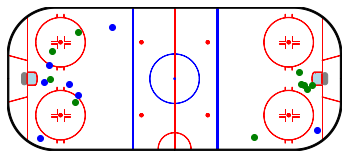

In [165]:
h_shots = shots[shots['team_name_shot']==home]
a_shots = shots[shots['team_name_shot']==away]

goals[['period','team_name_scorer']]
h_goals = goals[goals['team_name_scorer']==home]
a_goals = goals[goals['team_name_scorer']==away]

rink = NHLRink()
rink.scatter(h_goals['x_coord'], h_goals['y_coord'], marker='o', color='b')
rink.scatter(a_goals['x_coord'], a_goals['y_coord'], marker='o', color='g')
#rink.scatter(h_shots['x_coord'], h_shots['y_coord'], marker='x', color='b')
#rink.scatter(a_shots['x_coord'], a_shots['y_coord'], marker='x', color='g')

ax = rink.draw()

In [161]:
pen_events.groupby(['period','per_time_rem','team_name_pen','playername_pen','event_type']).\
agg({'playername_drew':'max'})

,,,,,playername_drew
period,per_time_rem,team_name_pen,playername_pen,event_type,
1,0 days 05:03:00,Maple Leafs,John Tavares,Tripping,Filip Zadina
2,0 days 13:32:00,Maple Leafs,Nicholas Robertson,Boarding,Moritz Seider
3,0 days 09:37:00,Maple Leafs,Mitchell Marner,Tripping,Carter Rowney


In [162]:
fs_lineup

,game_id,team_name,jersey_num,playername,pos_abbv,status,player_id,ep_playerid,ss_mean,ss_tot
0,2021021275,Maple Leafs,34,Auston Matthews,C,skater,8479318,199898,45.850021,2154.951
1,2021021275,Maple Leafs,89,Nicholas Robertson,LW,skater,8481582,NaN,NaN,NaN
2,2021021275,Maple Leafs,3,Justin Holl,D,skater,8475718,46905,4.021025,160.841
3,2021021275,Maple Leafs,65,Ilya Mikheyev,RW,skater,8481624,180935,10.114727,222.524
4,2021021275,Maple Leafs,23,Travis Dermott,N/A,scratch,8478408,214673,0.494838,18.309
5,2021021275,Maple Leafs,46,Ilya Lyubushkin,D,skater,8480950,123109,0.472521,22.681
6,2021021275,Maple Leafs,43,Kyle Clifford,N/A,scratch,8475160,15480,-3.334250,-40.011
7,2021021275,Maple Leafs,25,Ondrej Kase,RW,skater,8478131,165006,8.922047,383.648
8,2021021275,Maple Leafs,91,John Tavares (C),C,skater,8475166,9223,29.617633,1451.264
9,2021021275,Maple Leafs,24,Wayne Simmonds,RW,skater,8474190,12517,0.750224,36.761


## Player Info Groups

In [166]:
pl_info_gm.groupby('nation').agg({'player_id':'count'
                               ,'team_name':'count','team_name':'nunique'
                               ,'ss_mean':'mean','ss_tot':'sum'
                               ,'gs_mean':'mean','gs_tot':'sum'})\
    .sort_values('ss_tot', ascending=False)

,player_id,team_name,ss_mean,ss_tot,gs_mean,gs_tot
nation,,,,,,


In [218]:
pl_info.groupby('draft_year').agg({'ss_mean':'mean','ss_tot':'sum','player_id':'count'
                                  ,'team_name':'count','team_name':'nunique'})\
    .sort_values(['player_id','team_name'], ascending=[False,False])

,ss_mean,ss_tot,player_id,team_name
draft_year,,,,
2016,4.968911,1252.215,5,2
2014,18.264117,3104.455,4,2
2015,21.108047,3594.252,4,2
2009,14.459033,1445.627,3,2
2011,18.345868,1602.348,3,2
2012,5.222185,381.296,3,2
2007,8.207621,1177.875,3,1
2017,1.953066,167.872,2,2
2018,12.098109,1099.013,2,1


In [219]:
pl_info[pl_info['draft_year']=='2011'].groupby(['draft_year','draft_round','overall_pick','playername','team_name'])\
.agg({'ss_mean':'sum','ss_tot':'sum'})

ss_mean  \
draft_year draft_round overall_pick playername          team_name              
2011       1           1            Ryan Nugent-Hopkins Oilers     16.620048   
           2           58           Nikita Kucherov     Lightning  26.202214   
           7           208          Ondrej Palat        Lightning  12.215341   

                                                                    ss_tot  
draft_year draft_round overall_pick playername          team_name           
2011       1           1            Ryan Nugent-Hopkins Oilers     698.042  
           2           58           Nikita Kucherov     Lightning  366.831  
           7           208          Ondrej Palat        Lightning  537.475

In [220]:
pl_info.groupby('draft_round').agg({'ss_mean':'mean','ss_tot':'sum','player_id':'count'
                                   ,'team_name':'count','team_name':'nunique'})\
    .sort_values('draft_round', ascending=True)

,ss_mean,ss_tot,player_id,team_name
draft_round,,,,
1,14.885962,9893.802,16,2
2,8.818564,1205.153,6,2
3,12.440590,3146.710,6,2
4,9.442167,1261.606,3,2
5,21.874500,962.478,2,1
6,7.482833,359.176,1,1
7,12.215341,537.475,1,1


In [221]:
pl_info[pl_info['draft_round']==3].groupby(['draft_year','draft_round','overall_pick','playername','team_name'])\
.agg({'ss_mean':'sum','ss_tot':'sum'})

ss_mean  \
draft_year draft_round overall_pick playername         team_name              
2007       3           77           Alex Killorn       Lightning  10.085898   
2009       3           64           Tyson Barrie       Oilers      4.456318   
2014       3           67           Warren Foegele     Oilers      7.933060   
                       79           Brayden Point      Lightning  28.712114   
2015       3           72           Anthony Cirelli    Lightning  24.190841   
2016       3           63           Markus Niemelainen Oilers     -0.734692   

                                                                    ss_tot  
draft_year draft_round overall_pick playername         team_name            
2007       3           77           Alex Killorn       Lightning   494.209  
2009       3           64           Tyson Barrie       Oilers      196.078  
2014       3           67           Warren Foegele     Oilers      396.653  
                       79           Brayden Point      Lightning  1004.924  
2015       3           72           Anthony Cirelli    Lightning  1064.397  
2016       3           63           Markus Niemelainen Oilers       -9.551

In [222]:
pl_info.groupby('place_of_birth').agg({'ss_mean':'mean','ss_tot':'sum'
                                       ,'team_name':'count','team_name':'nunique'
                                       ,'player_id':'count'})\
    .sort_values('player_id', ascending=False).iloc[:6]

,ss_mean,ss_tot,team_name,player_id
place_of_birth,,,,
"Markham, ON, CAN",18.341999,1776.698,2,2
"Spokane, WA, USA",6.549515,610.864,1,2
"Toronto, ON, CAN",11.912361,1050.238,2,2
"Ajax, ON, CAN",5.543793,160.770,1,1
"St. Louis, MO, USA",7.482833,359.176,1,1
"Ottawa, ON, CAN",4.900578,220.526,1,1


In [223]:
pl_info[pl_info['place_of_birth']=='Markham, ON, CAN'].groupby(['draft_year','draft_round','overall_pick','playername','team_name'])\
.agg({'dob':'max','ss_mean':'sum','ss_tot':'sum'})

,,,,,dob,ss_mean,ss_tot
draft_year,draft_round,overall_pick,playername,team_name,,,
2008,1,1,Steven Stamkos (C),Lightning,1990-02-07,28.750937,1380.045
2014,3,67,Warren Foegele,Oilers,1996-04-01,7.933060,396.653


In [224]:
pl_car[pl_car!='NHL'].groupby('league').agg({'ss_mean':'sum','ss_tot':'sum','player_id':'count','player_id':'nunique'
                                            ,'team_name':'count','team_name':'nunique'})\
    .sort_values(['player_id','ss_mean'], ascending=[False,False]).iloc[:20]

,ss_mean,ss_tot,player_id,team_name
league,,,,
AHL,612.410044,26071.882,32,2
WC,916.583057,38861.186,25,2
WJC-20,528.218371,20533.171,24,2
WHC-17,225.275060,9371.212,20,2
WJC-18,328.504071,13779.844,19,2
Hlinka Gretzky Cup,196.721606,7360.933,17,2
Jr Super Series,341.494462,14056.685,16,2
OHL,601.478620,26838.780,15,2
WCup,208.817092,8998.914,11,2


In [225]:
lg = 'M-Cup'
pl_car[pl_car['league']==lg]\
    .groupby(['season','team','team_name','playername','postseason'])\
.agg({'pos_abbv':'max','gp':'max','g_gaa':'max', 'tp_svpct':'max','ss_mean':'mean'})

pos_abbv  \
season  team                team_name playername        postseason                
2004-05 London Knights      Lightning Corey Perry       Champion             RW   
2006-07 Vancouver Giants    Oilers    Evander Kane      Champion             LW   
2008-09 Kelowna Rockets     Oilers    Tyson Barrie      Final loss            D   
2014-15 Kelowna Rockets     Oilers    Leon Draisaitl    Final loss            C   
        Oshawa Generals     Lightning Anthony Cirelli   Champion              C   
2016-17 Erie Otters         Lightning Anthony Cirelli   Final loss            C   
                                      Erik Cernak       Final loss            D   
                                      Taylor Raddysh    Final loss           RW   
                            Oilers    Warren Foegele    Final loss           LW   
        Saint John Sea Dogs Lightning Mathieu Joseph    Semifinal loss       RW   
        Windsor Spitfires   Lightning Mikhail Sergachev Champion              D   

                                                                        gp  \
season  team                team_name playername        postseason           
2004-05 London Knights      Lightning Corey Perry       Champion         4   
2006-07 Vancouver Giants    Oilers    Evander Kane      Champion         2   
2008-09 Kelowna Rockets     Oilers    Tyson Barrie      Final loss       4   
2014-15 Kelowna Rockets     Oilers    Leon Draisaitl    Final loss       5   
        Oshawa Generals     Lightning Anthony Cirelli   Champion         4   
2016-17 Erie Otters         Lightning Anthony Cirelli   Final loss       5   
                                      Erik Cernak       Final loss       5   
                                      Taylor Raddysh    Final loss       5   
                            Oilers    Warren Foegele    Final loss       5   
        Saint John Sea Dogs Lightning Mathieu Joseph    Semifinal loss   4   
        Windsor Spitfires   Lightning Mikhail Sergachev Champion         4   

                                                                        g_gaa  \
season  team                team_name playername        postseason              
2004-05 London Knights      Lightning Corey Perry       Champion          4.0   
2006-07 Vancouver Giants    Oilers    Evander Kane      Champion          0.0   
2008-09 Kelowna Rockets     Oilers    Tyson Barrie      Final loss        0.0   
2014-15 Kelowna Rockets     Oilers    Leon Draisaitl    Final loss        4.0   
        Oshawa Generals     Lightning Anthony Cirelli   Champion          2.0   
2016-17 Erie Otters         Lightning Anthony Cirelli   Final loss        1.0   
                                      Erik Cernak       Final loss        0.0   
                                      Taylor Raddysh    Final loss        5.0   
                            Oilers    Warren Foegele    Final loss        2.0   
        Saint John Sea Dogs Lightning Mathieu Joseph    Semifinal loss    2.0   
        Windsor Spitfires   Lightning Mikhail Sergachev Champion          1.0   

                                                                        tp_svpct  \
season  team                team_name playername        postseason                 
2004-05 London Knights      Lightning Corey Perry       Champion             7.0   
2006-07 Vancouver Giants    Oilers    Evander Kane      Champion             1.0   
2008-09 Kelowna Rockets     Oilers    Tyson Barrie      Final loss           4.0   
2014-15 Kelowna Rockets     Oilers    Leon Draisaitl    Final loss           7.0   
        Oshawa Generals     Lightning Anthony Cirelli   Champion             3.0   
2016-17 Erie Otters         Lightning Anthony Cirelli   Final loss           8.0   
                                      Erik Cernak       Final loss           2.0   
                                      Taylor Raddysh    Final loss          11.0   
                            Oilers    Warren Foegele    Final loss           7.0  

In [226]:
pl_car[pl_car['league']!='NHL'].groupby(['teamid','season','league','team','postseason'])\
    .agg({'player_id':'count','team_name':'count','team_name':'nunique', 'ss_mean':'mean' })\
        .sort_values(['player_id','team'],ascending=[False,True]).iloc[25:60]

,,,,,player_id,team_name,ss_mean
teamid,season,league,team,postseason,,,
6036/WHC-17/2007-08,2007-08,WHC-17,Canada Pacific U17,Bronze game loss,2,1,10.880386
14443/Hlinka Gretzky Cup/2016-17,2016-17,Hlinka Gretzky Cup,Canada U18,Placement game win,2,1,12.098109
1618/WJC-20/2017-18,2017-18,WJC-20,Canada U20,Champion,2,1,1.889597
16277/WHC-17/2015-16,2015-16,WHC-17,Canada White U17,Champion,2,1,12.098109
1602/WC/2018-19,2018-19,WC,Czech Republic,Bronze game loss,2,1,7.933848
6831/EHT/2018-19,2018-19,EHT,Czech Republic,0,2,1,7.933848
868/OHL/2014-15,2014-15,OHL,Erie Otters,Final loss,2,2,20.566465
868/OHL/2015-16,2015-16,OHL,Erie Otters,Semifinal loss,2,1,7.633702
101/AHL/2011-12,2011-12,AHL,Norfolk Admirals,Champion,2,1,11.150619


In [227]:
tid = '8178/GTHL U16/2013-14'
stmt = "where ct.teamid = '%s' and vt.season='2021-22'"%(tid)
cl_team = pn_queries.control_lookback(stmt)

In [228]:
cl_team.groupby(['league','team','postseason','playername','v_league','v_team','position'])\
.agg({'gp':'max','g_gaa':'max','tp_svpct':'max','v_gp':'max'})\
.sort_values('gp', ascending=False)

gp  \
league   team                      postseason playername          v_league     v_team                   position       
GTHL U16 Toronto Marlboros U16 AAA Final loss Cliff Pu            KHL          Kunlun Red Star          RW/C      33   
                                              Matthew Cairns      AHL          Rochester Americans      D         33   
                                                                  ECHL         Cincinnati Cyclones      D         33   
                                              Michael McLeod      NHL          New Jersey Devils        C         33   
                                              Joseph Mizzi        Champions HL HC Bolzano               RW        31   
                                                                  ICEHL        HC Bolzano               RW        31   
                                              Taylor Raddysh      NHL          Tampa Bay Lightning      RW        31   
                                              Jake Harris         NCAA         Brown Univ.              LW        27   
                                              Ryan McLeod         AHL          Bakersfield Condors      C          2   
                                                                  NHL          Edmonton Oilers          C          2   
                                              Matthew Strome      AHL          Lehigh Valley Phantoms   LW         1   
                                                                  ECHL         Reading Royals           LW         1   
                                              Ben Jones           AHL          Henderson Silver Knights C          0   
                                                                  NHL          Vegas Golden Knights     C          0   
                                              MacKenzie Entwistle AHL          Rockford IceHogs         RW/C       0   
                                                                  NHL          Chicago Blackhawks       RW/C       0   

                                                                                                                  g_gaa  \
league   team                      postseason playername          v_league     v_team                   position          
GTHL U16 Toronto Marlboros U16 AAA Final loss Cliff Pu            KHL          Kunlun Red Star          RW/C       23.0   
                                              Matthew Cairns      AHL          Rochester Americans      D           8.0   
                                                                  ECHL         Cincinnati Cyclones      D           8.0   
                                              Michael McLeod      NHL          New Jersey Devils        C          21.0   
                                              Joseph Mizzi        Champions HL HC Bolzano               RW         17.0   
                                                                  ICEHL        HC Bolzano               RW         17.0   
                                              Taylor Raddysh      NHL          Tampa Bay Lightning      RW         25.0   
                                              Jake Harris         NCAA         Brown Univ.              LW          9.0   
                                              Ryan McLeod         AHL          Bakersfield Condors      C           0.0   
                                                                  NHL          Edmonton Oilers          C           0.0   
                                              Matthew Strome      AHL          Lehigh Valley Phantoms   LW          2.0   
                                                                  ECHL         Reading Royals           LW          2.0   
                                              Ben Jones           AHL          Henderson Silver Knights C           0.0   
                                                                  NHL          Vegas Golden Knights     C   

In [229]:
pl_awards.groupby(['award']).agg({'player_id':'count','team_name':'count',
                                            'player_id':'nunique','team_name':'nunique'})\
.sort_values('player_id', ascending=False).iloc[10:50]

,player_id,team_name
award,,
NHL Most Valuable Player (Hart Trophy),4,2
OHL First All-Star Team,4,2
NHL Most Points (Art Ross Trophy),3,2
U20 WJC All-Star Team,3,2
NHL MVP Selected by NHLPA (Ted Lindsay Award),3,2
NHL Most Assists,3,2
OHL Scholastic Player of the Year (Bobby Smith Trophy),3,2
WHL (East) First All-Star Team,3,2
WHL (West) First All-Star Team,3,2


In [230]:
pl_awards[pl_awards['award']=='U20 WJC All-Star Team']\
.groupby(['award','league','team_name','season','playername']).agg({'ss_mean':max,'ss_tot':max})

ss_mean  \
award                 league team_name season  playername                       
U20 WJC All-Star Team WJC-20 Lightning 2007-08 Victor Hedman        21.616327   
                             Oilers    2012-13 Ryan Nugent-Hopkins  16.620048   
                                       2014-15 Connor McDavid (C)   39.182708   

                                                                      ss_tot  
award                 league team_name season  playername                     
U20 WJC All-Star Team WJC-20 Lightning 2007-08 Victor Hedman        1059.200  
                             Oilers    2012-13 Ryan Nugent-Hopkins   698.042  
                                       2014-15 Connor McDavid (C)   1880.770